<a href="https://colab.research.google.com/github/Taykehrle/ModeloKnn01/blob/main/PROJETO_CLASSIFICACAO_K_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **PROJETO: modelo de *Machine Learning* para tarefa de classificação.**




Construir um modelo de *machine learning* que classifique os clientes que pedem empréstimo como:

- Clientes **adimplentes** (pagam o empréstimo)

- Clientes **inadimplentes** (não pagam o empréstimo).


## **02.COMPREENSÃO DOS DADOS.**

In [ ]:
# IMPORTAR BIBLIOTECAS NECESSÁRIAS.
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
# CRIANDO O DATAFRAME DE CREDITO
df = pd.read_csv("/content/dados_de_credito.csv")

In [ ]:
# VISUALIZAR AS PRIMEIRAS LINHAS DO DATAFRAME.
df.head()

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
# TROCANDO OS NOMES DOS ATRIBUTOS.

df.rename(columns={"clientid":'clientid',
                   'income':'SALARIO',
                   'age':'IDADE',
                   'loan':'EMPRESTIMO',
                   'default':'INADIMPLENCIA'},inplace=True)





In [ ]:
# FORMATO DO DATAFRAME
df.shape

(2000, 5)

In [ ]:
# TIPOS DE DADOS DO ATRIBUTO
df.dtypes

clientid           int64
SALARIO          float64
IDADE            float64
EMPRESTIMO       float64
INADIMPLENCIA      int64
dtype: object

In [ ]:
# VERIFICANDO VALORES AUSENTES.
df.isnull().sum()

clientid         0
SALARIO          0
IDADE            3
EMPRESTIMO       0
INADIMPLENCIA    0
dtype: int64

In [ ]:
# VALORES ÚNICOS DO ATRIBUTO ALVO
df.INADIMPLENCIA.unique()

array([0, 1])

In [ ]:
# CONTAR VALORES DO ATRIBUTO ALVO.
df.INADIMPLENCIA.value_counts()

0    1717
1     283
Name: INADIMPLENCIA, dtype: int64

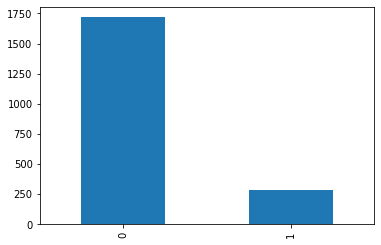

In [ ]:
# VIZUALIZANDO CLASSES DO ATRIBUTO ALVO INADIMPLENCIA.

fig,ax_01 = plt.subplots()
df.INADIMPLENCIA.value_counts().plot(kind='bar',ax=ax_01);


In [ ]:
# DESCREVER OS DADOS ESTATÍSTICOS
df.describe()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


- Gerar um histograma para o atributo **`IDADE`**.



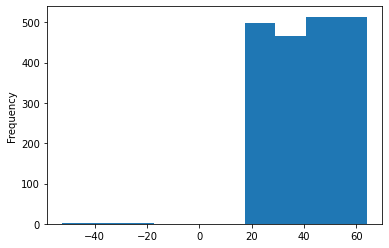

In [ ]:
# HISTOGRAMA PARA IDADE

fig, ax_02 = plt.subplots()
df.IDADE.plot(kind='hist',ax=ax_02);



- Gerar um histograma para entender a **distribuição de frequência** dos valores de empréstimo:


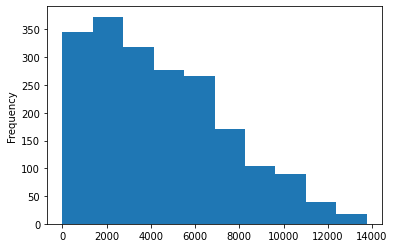

In [ ]:
# HISTOGRAMA PARA  EMPRESTIMO

fig, ax_03 = plt.subplots()
df.EMPRESTIMO.plot(kind='hist',ax=ax_03);



- Usar a biblioteca **Plotly** para gerar gráfico de dispersão.



In [ ]:
# VISUALIZAR A DISPERSÃO DOS ATRIBUTOS NUMÉRICOS.

grafico = px.scatter_matrix(df,dimensions=['IDADE','SALARIO','EMPRESTIMO'],color='INADIMPLENCIA')
grafico.show()

## **03.PREPARAR OS DADOS.**

In [ ]:
# LOCALIZAR DADOS ERRADOS NO ATRIBUTO IDADE - COM FILTRO DE FATIA DO PANDAS
df[df.IDADE<0]

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# LOCALIZAR DADOS ERRADOS NO ATRIBUTO IDADE - COM O COMANDO loc
df.loc[df.IDADE<0]

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
15,16,50501.726689,-28.218361,3977.287432,0
21,22,32197.620701,-52.423280,4244.057136,0
26,27,63287.038908,-36.496976,9595.286289,0


In [ ]:
# APAGAR AS LINHAS COM DADOS ERRADOS.
df = df.drop(df[df.IDADE<0].index)

In [ ]:
# VERIFICANDO A EXCLUSÃO DOS VALORES MENORES DO QUE ZERO DO ATRIBUTO IDADE.
df.describe()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
count,1997.000000,1997.000000,1994.000000,1997.000000,1997.000000
mean,1001.970456,45326.596720,40.927700,4442.124566,0.141713
std,576.679293,14327.971550,13.271802,3045.494192,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.043284,1936.813257,0.000000
50%,1002.000000,45788.747100,41.382673,3971.155479,0.000000
75%,1501.000000,57787.565659,52.616900,6429.593688,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
# LOCALIZAR LINHAS COM VALORES AUSENTES.
df.loc[df.IDADE.isnull()]

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
# SUBSTITUIR OS VALORES AUSENTES COM A MÉDIA DO ATRIBUTO IDADE
df.IDADE.fillna(df.IDADE.mean(),inplace=True)

In [ ]:
# VERIFICAR SE AINDA HÁ DADOS AUSENTES.
df.isnull().sum()

clientid         0
SALARIO          0
IDADE            0
EMPRESTIMO       0
INADIMPLENCIA    0
dtype: int64

In [ ]:
# EXPORTAR BASE DE DADOS LIMPA
df.to_csv('dados_de_credito_limpo.csv',index=False)

In [ ]:
# VISUALIZAR NOVAMENTE OS ATRIBUTOS COM O MÉTODO head().
df.head()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
# SEPARANDO OS ATRIBUTOS PREDITORES. 
X_atributos_preditores = df.iloc[:,1:4].values

In [ ]:
# ATRIBUTO ALVO
y_atributo_alvo = df.iloc[:,4].values

In [ ]:
# Visualizando a diferença de escala entre os valores do atributo.
df.describe()

,clientid,SALARIO,IDADE,EMPRESTIMO,INADIMPLENCIA
count,1997.000000,1997.000000,1997.000000,1997.000000,1997.000000
mean,1001.970456,45326.596720,40.927700,4442.124566,0.141713
std,576.679293,14327.971550,13.261825,3045.494192,0.348842
min,1.000000,20014.489470,18.055189,1.377630,0.000000
25%,503.000000,32804.904487,29.072097,1936.813257,0.000000
50%,1002.000000,45788.747100,41.317159,3971.155479,0.000000
75%,1501.000000,57787.565659,52.587040,6429.593688,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [ ]:
# 01.IMPORTAR O StandardScaler.

from sklearn.preprocessing import StandardScaler

# 02.CRIAR O OBJETO QUE IRÁ ESCALONAR OS DADOS.
escalonador = StandardScaler()

# 03.ESCALONAR OS DADOS DOS ATRIBUTOS PREDITORES.
X_atributos_preditores = escalonador.fit_transform(X_atributos_preditores)

In [ ]:
# VALOR MÍNIMO
X_atributos_preditores.max()

3.062314831209602

In [ ]:
# VALOR MÁXIMO
X_atributos_preditores.min()

-1.7670643102584795

In [ ]:
# 01.A PARTIR DA BIBLIOTECA SCIKIT-LEARN IMPORTAR COMANDO train_test_split
from sklearn.model_selection import train_test_split

In [ ]:
# 02.DIVIDIR DADOS ENTRE TREINO E TESTE - ATRIBUTOS PREDITORES E ATRIBUTO ALVO.
X_treino, X_teste, y_treino, y_teste = train_test_split(X_atributos_preditores,y_atributo_alvo, test_size=0.25, random_state=0)

In [ ]:
# 01.Importar o algoritmo de aprendizagem K-NN para a tarefa de classificação.
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# 02.Usar o K-NN e seus parâmetros para criar um modelo.


In [ ]:
# 03.Treinar o modelo com os dados de treino.
modelo_knn_classificacao = KNeighborsClassifier(n_neighbors=5,metric='minkowski', p=2)
modelo_knn_classificacao.fit(X_treino,y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
# 04.Usar o modelo e os dados de teste (X_teste) para realizar as predições.
predicoes = modelo_knn_classificacao.predict(X_teste)


In [ ]:
# 01.A partir da biblioteca Scikit-learn importar as métricas de avaliação do desempenho do modelo de classificação.
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# 02.Verificar a acurácia do modelo a partir dos valores de y_teste e predicoes.
accuracy_score(y_teste,predicoes)

0.98

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



0.98

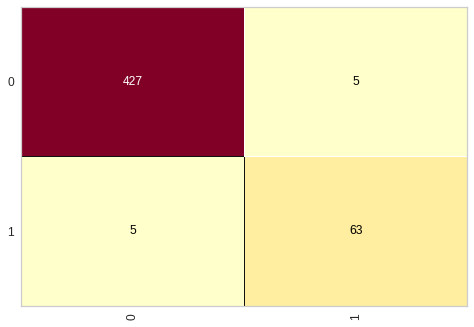

In [ ]:
# 03.Visualizar a matriz de confusão com a biblioteca de gráficos Yellowbrick

from yellowbrick.classifier import ConfusionMatrix
matriz_confusao = ConfusionMatrix(modelo_knn_classificacao)
matriz_confusao.fit(X_treino,y_treino)
matriz_confusao.score(X_teste,y_teste)



In [ ]:
# 04.Verificar os valores das métricas precision(precisão) e recall a partir da comparação entre os valores de y_teste e predicoes
print(classification_report(y_teste,predicoes))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       432
           1       0.93      0.93      0.93        68

    accuracy                           0.98       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.98      0.98      0.98       500

